## IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# DATABASE FILLING

### Functions

In [3]:

def clean_the_df(file_path):
    ''' 
    Take the path to a csv imported direclty from the Optitrack software in entry
    Return a cleaned csv version
    '''
    raw_df=pd.read_csv(file_path, skiprows = 6)
    raw_df.set_index(["Frame",'Time (Seconds)'], inplace=True)
    
    return raw_df

In [93]:
def create_data(clean_df, file_name):
    '''
    Take a dataframe cleaned and the name we want for the csv in entry
    Create 2 new csv from it, and store them where they belong
    ''' 
    #create a csv containing all the data
    clean_df.to_csv("./data/" + file_name)
    #create a csv containing the coordinates of the center of gravity only
    #Here the 3 columns for the ab body part are 11 to 13
    clean_df.iloc[:, 11:14].to_csv("./data/gravity_center/" +"Gravity_center" + file_name)



### Activation

In [94]:
for root, dirs, files in os.walk("./raw_csv_data/", topdown=False):
   for name in files:
      create_data(clean_the_df(os.path.join(root, name)), name)

# GRAVITY CENTER

In [96]:
df_0 = pd.read_csv(".\data\Fosco chen31 mouv1.csv")
df = df_0 [df_0.Frame <= 10]
print(df.iloc[:, 13:16])


# indexes for xyz are 7i -1/0/+1
# there are 21 body parts
x = []
y = []
z = []

for t in range(len(df)):
    x_0 = []
    y_0 = []
    z_0 = []

    for i in range(1,22):
        x_0.append(df.iloc[t, 7*i-1])
        y_0.append(df.iloc[t, 7*i])
        z_0.append(df.iloc[t, 7*i+1])

    x.append(x_0)
    y.append(y_0)
    z.append(z_0)

         X.3       Y.3       Z.3
0   0.558030  0.807452  0.687555
1   0.558607  0.808288  0.687858
2   0.558053  0.807602  0.687879
3   0.557828  0.807300  0.688261
4   0.558407  0.808139  0.688678
5   0.558575  0.808078  0.688853
6   0.558759  0.808035  0.689047
7   0.558368  0.807737  0.688745
8   0.558491  0.807758  0.688888
9   0.559011  0.807533  0.689079
10  0.559133  0.807669  0.689185


# PLOT 3D PART

In [97]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [98]:
body_part = ["hips", "ab","chest","neck","head","Lshoulder","LUarm","LFarm","Lhand","Rshoulder","RUarm","RFarm","Rhand", "Lthigh", "Lshin", "Lfoot", "Rthigh", "Rshin", "Rfoot","Ltoe","Rtoe" ]
print(len(body_part))


21


## FUNCTIONS

In [102]:
def line_between(A, B):
    '''
    Take 2 vectors in entry and return the coordinates of 30 points linearly spaced of the segment between them
    '''
    L = []
    lambdas = np.linspace(0,1,30)

    for l in lambdas:
        new_A = [a * l for a in A]
        new_B = [b * (1-l) for b in B]
        L.append([new_A[i] + new_B[i] for i in [0,1,2]])

    return [l[0] for l in L], [l[1] for l in L], [l[2] for l in L]


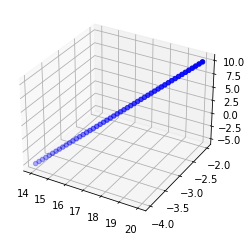

In [101]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x,y,z = line_between([14,-4,-5], [20,-2,10])
ax.scatter3D(x,y,z, c='blue')

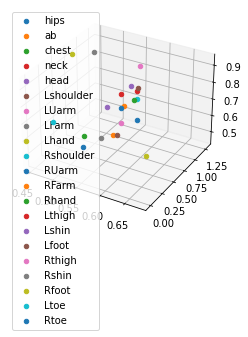

In [52]:
# début  du 3d plotting 

fig = plt.figure()
ax = plt.axes(projection='3d')
t = 1
for i in range(21):
    ax.scatter3D(x[t][i], y[t][i], z[t][i], label = body_part[i])

plt.legend()
plt.show()


In [46]:
#test pour stream plot

for t in range(len(df)):

    ax.clear()
    ax.scatter3D(x[t][0], y[t][0], z[t][0])
    plt.pause(0.1)

plt.show()